In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import mathfinance as mf
import scipy.optimize
plt.rcParams['figure.figsize'] = [15,7]

### One-Period Binomial Model
In a financial market, there is a `Risky asset` $S_t$(stock). The value of the stock at time ($t = 0$) is $S_0$.
We assume a stock moves up a factor of $u$ or down a factor $d$ with a probability of $p$ or $(q = 1-p)$ respectively. There is also `Non-Risky asset` which can be a Bank Account or a Bond. $B_0$ is the amount invested in Bank Account at time ($t = 0$). Hence at time ($t = 1$), $B_1 = B_0(1+r)$ or $B_1 = B_0 e^{rT}$ in continuous time. In general, we have the interest rate $r \geq 0$. 

<img src="pics/binomial1.jpg" width="330" height="500"/>
<img src="pics/binomial2.jpg" width="530" height="500"/>

### Arbitrage
- `Type I Arbitrage`:
In this case we begin our portfolio with zero investment and have zero chance of losing money and some chance of profit. Let $V_t$ be the portfolio value at time t.
$$
\Biggl\{
\begin{split}
V_0 &= 0 \\
\mathbb{P}(V_T \geq 0) &= 1 \qquad \text{(No chance of losing money)} \\
\mathbb{P}(V_T > 0) &> 0 \qquad \text{(Some chance of profit)} \\
\end{split}
$$

- `Type II Arbitrage`:
In this case we receive credit today.
$$
\Biggl\{
\begin{split}
V_0 &< 0 \qquad \text{(Receive credit)} \\
\mathbb{P}(V_T \geq 0) &= 1 \qquad \text{(No chance of losing money)} \\
\end{split}
$$

### Replicating Portfolio
As an Option seller, we receive fee $X_0$ from buyer of the option. By trading in risky and non-risky assets at time $t = 1$, the value of the option should be same as our investment.
- At $t = 0$, $X_0 = V_0$ i.e. the price of the option $V_0$ must be same as portfolio.
- At $t = 1$, $X_1 = V_1$ for all possibilities up or down.

### Law of One Price Theorem
Let $V^{i}_{T} = \text{Portfolio i at time T}$. 
$$ \mathbb{P}(V_{T}^{\alpha} = V_{T}^{\beta}) = 1 \implies V_{0}^{\alpha} = V_{0}^{\beta}$$
If we have two portfolios $\alpha$ and $\beta$ with same value at time $T$(maturity) Then, the portfolios are the same at the start time $T = 0$.

### Evolution of Stock Price(3-Period)
Here is evolution of Stock price tree in binomial model for 3-period. We have used the recombining tree for computational efficiency.

<img src="pics/binomial3.jpg" width="400" height="500"/>

Using Law of One-Price Theorem, if we have $\mathbb{P}(S_T + B_T = C_T) = 1$ (i.e. combined stock value and bank account at time T equals Option price at T) Then, $V_0 = C_0$.

$V_T = (S_T,B_T) \cdot \theta$ where $\theta = \begin{pmatrix} \beta \\ \alpha \end{pmatrix}$.
$\beta$ is the quantity of stock and $\alpha$ is the quantity of bank account. Now using the Theorem,
$$
\begin{align}
C_0 &= \alpha B_0 + \beta S_0 \qquad \text{(Law of One Price equation)} \\
C_0 &= \alpha + \beta S_0 \tag 1 \qquad \text{(Since $B_0 = 1$ at t = 1)} \\
\end{align}
$$

$$
\begin{align}
C_u &= \alpha B_T + \beta S_0 u  \\
    &= \alpha e^{rT} + \beta S_0 u \tag 2 \\
C_d &= \alpha B_T + \beta S_0 d  \\
    &= \alpha e^{rT} + \beta S_0 d \tag 3 \\    
\end{align}
$$
(2)-(3) gives:
$$
\begin{align}
C_u - C_d &= \beta (S_0 u - S_0 d)  \\
\beta &= \frac {C_u - C_d }{S_0 u - S_0 d} \tag 4 \\    
\end{align}
$$
Using (3),
$$
\begin{align}
C_d &= \alpha e^{rT} + \beta S_0 d  \\
\alpha &= e^{-rT} (C_d - \beta S_0 d)  \tag 5 \\    
\end{align}
$$
Substituting (4) and (5) into (1):
$$
\begin{align}
C_0 &= \alpha + \beta S_0  \\
    &= e^{-rT} (C_d - \beta S_0 d) + \beta S_0 \\ 
    &= e^{-rT}[C_d - \beta S_0 d + \beta S_0 e^{rT}] \\
    &= e^{-rT}[C_d + \beta (S_0 e^{rT} - S_0 d)] \\
    &= e^{-rT}\Bigl[C_d + \frac {C_u - C_d}{S_0 u - S_0 d} (S_0 e^{rT} - S_0 d)\Bigl] \\
    &= e^{-rT}\Bigl[C_d + C_u \frac {S_0 e^{rT} - S_0 d}{S_0 u - S_0 d} - C_d \frac {S_0 e^{rT} - S_0 d}{S_0 u - S_0 d}\Bigl] \\
    &= e^{-rT}\Bigl[\frac {S_0 e^{rT} - S_0 d}{S_0 u - S_0 d} C_u + (1 - \frac {S_0 e^{rT} - S_0 d}{S_0 u - S_0 d})C_d \Bigl] \\
    &= e^{-rT}\Bigl[\frac {e^{rT} - d}{u - d} C_u + (1 - \frac {e^{rT} - d}{u - d})C_d \Bigl] \\
C_0 &= e^{-rT}[\tilde{p} C_u + (1 - \tilde{p})C_d] \tag 6\\
\end{align}
$$
Here, $\tilde{p} = \frac {e^{rT} - d}{u - d}$ is a Risk-Neutral measure. Note $\tilde{p}$ is not the physical probability of up/down of stock. Also  $0 < \tilde{p} < 1$.
- `Lemma:` Binomial Model has No-Arbitrage iff $0 < d < 1+r < u$.

(6) is the No-Arbitrage formula built from Law of One price which can be used to price options by backward propogation even for Multi-period model.

#### Stencil for Pricing
We use the Recombining Stock tree using nodes $(i,j)$ and initial stock price $S_0$. $C_{i,j}$ = Derivative price at node $(i,j)$.
<img src="pics/binomial4.jpg" width="400" height="500"/>

$j$ goes from bottom to top and $i$ goes from left to right in terms of `time steps`. Each node of this Multi-period Binomial tree is represented $(i,j)$. In this tree: $$S_{i,j} = S_0 u^jd^{i-j}$$ In N-period Model, the terminal condition for the derivative is the Payoff at the last time step N. So, 
$$
\begin{align}
C_{N,j} &= \text{Payoff Function} \\
C_{N,j} &= Max(S_{N,j} - K, 0) \qquad \text{(Call Option Payoff)}
\end{align}
$$
We can use (6) formula backwards to get prices for each preceding nodes.

At expiration, we know the price of the option.  It is either 0 if out-of-the-money, or its intrinsic value if in-the-money.

The price at the preceding node is then give by, 
$$C = e^{-rt}(pC_u + (1-p)C_d)$$

If the tree has multiple layers as shown above, we can then repeat the above process to entirely fill out the tree.
### The Cox-Ross-Rubinstein model
As number of steps increases, to form a binomial tree with $\Delta t$ step size, we must select $u$ and $d$, such that they are consistent with stock return’s volatility. Cox, Ross and Rubinstein purposed by setting $u$ and $d$ as:
$$
u = e^{\sigma \sqrt{\Delta t}}\\
d = \frac {1}{u} = e^{-\sigma \sqrt{\Delta t}}
$$


We now write a function that calculates the price of European Call/Put Option using the Binomial Tree Model.

In [2]:
def binomial_pricer(S0, K, r, T, M, sigma, type = "call"):
    '''
    Calculates the Price of a European call/put option with strike K and maturity T using Binomial Model. 
    Uses Cox-Ross-Rubinstein model.
    
            Parameters:
                    S0 (double): Current price of the underlying asset.
                    K (double) : Strike price of the option.
                    r (double) : Risk-free Interest Rate.
                    T (double) : Time to maturity/expiration (in years).
                    M (Int)    : Number of points in time direction.
                    sigma (double) : Volatility of the underlying asset.
                    type (String) : European call or put option.

            Returns:
                    price (double): Price of a European call/put option.
    '''
    N = M-1     # Number of time steps.
    dt = T/N    # Time-step size.
    u = np.exp(sigma * np.sqrt(dt))
    d = 1/u     # Down-factor in Binomial model. 1/u ensures that it is a recombining tree.
    p = (np.exp(r*dt) - d) / (u-d)    # Risk-Neutral probability measure.     
    S  = np.zeros( (M, M) )    # Initialising Stock Price matrix with all zeros.
    O = np.zeros( (M, M) )     # Initialising Option Price matrix with all zeros.

    # Generating Stock Prices.
    S[0, 0] = S0
    #  Fill out the remaining values.
    for i in range(1, M ):
        Q = i + 1
        S[i, 0] = d * S[i-1, 0]
        for j in range(1, M ):
            S[i, j] = u * S[i - 1, j - 1]
 
    #  Calculate the option price at expiration.
    if type == "call":
        expiration = S[-1,:] - K
    elif type == "put":
        expiration = K - S[-1,:]
           
    expiration.shape = (expiration.size, )
    expiration = np.where(expiration >= 0, expiration, 0)
    O[-1,:] =  expiration   # Set the last row of the Options matrix to our expiration values.

    #  Backpropagate to fill the remaining Options values at each nodes.
    for i in range(M - 2,-1,-1):
        for j in range(i + 1):
            O[i,j] = np.exp(-r * dt) * ((1-p) * O[i+1,j] + p * O[i+1,j+1])

    return O[0,0]

In [14]:
# Initialise parameters.
S0 = 100      # Initial stock price.
K = 100       # Strike price.
T = 1         # Time to maturity in years.
r = 0.05      # Annual risk-free rate.
M = 5         # Number of points in time direction.
sigma = 0.25   # Volatility.

call_price = binomial_pricer(S0, K, r, T, M, sigma, type = "call")
print(call_price)

11.742554611618315


Lets vectorize our `binomial_pricer` and make use of the formula $S_{i,j} = S_0 u^jd^{i-j}$ so that our code runs efficiently.

In [15]:
def binomial_pricer_vectorized(S0, K, r, T, M, sigma, type = "call"):
    '''
    Calculates the Price of a European call/put option with strike K and maturity T using Binomial Model.
    Uses Cox-Ross-Rubinstein model.
            Parameters:
                    S0 (double): Current price of the underlying asset.
                    K (double) : Strike price of the option.
                    r (double) : Risk-free Interest Rate.
                    T (double) : Time to maturity/expiration (in years).
                    M (Int)    : Number of points in time direction.
                    sigma (double) : Volatility of the underlying asset.
                    type (String) : European call or put option.

            Returns:
                    price (double): Price of a European call/put option.
    '''
    N = M-1     # Number of time steps.
    dt = T/N    # Time-step size.
    u = np.exp(sigma * np.sqrt(dt))
    d = 1/u     # Down-factor in Binomial model. 1/u ensures that it is a recombining tree.
    p = (np.exp(r*dt) - d) / (u-d)    # Risk-Neutral probability measure. 
   
    # Initialising Asset prices at maturity - Time step N.
    S = S0 * d ** (np.arange(N,-1,-1)) * u ** (np.arange(0,N+1,1))

    # Initialise option values at maturity.
    if type == "call":
        O = np.maximum( S - K , np.zeros(N+1) )
    elif type == "put":
        O = np.maximum( K - S , np.zeros(N+1) )    

    # Backpropagate to fill the remaining Options values at each nodes.
    for i in np.arange(N,0,-1):
        O = np.exp(-r*dt) * ( p * O[1:i+1] + (1-p) * O[0:i] )

    return O[0]

call_price = binomial_pricer_vectorized(S0, K, r, T, M, sigma, type = "call")
print(call_price)

11.742554611618315


Lets compare the time taken by `binomial_pricer()` with `binomial_pricer_vectorized()`

In [16]:
for M in [5, 50, 500, 1000, 2500]:
    start_time = time.time()
    binomial_pricer(S0, K, r, T, M, sigma, type="call")
    end_time = time.time()
    print(f"Time taken for binomial_pricer with M={M}: {end_time - start_time} seconds")

    start_time = time.time()
    binomial_pricer_vectorized(S0, K, r, T, M, sigma, type="call")
    end_time = time.time()
    print(f"Time taken for binomial_pricer_vectorized with M={M}: {end_time - start_time} seconds")

Time taken for binomial_pricer with M=5: 0.0 seconds
Time taken for binomial_pricer_vectorized with M=5: 0.0009632110595703125 seconds
Time taken for binomial_pricer with M=50: 0.008418083190917969 seconds
Time taken for binomial_pricer_vectorized with M=50: 0.0 seconds
Time taken for binomial_pricer with M=500: 0.3694324493408203 seconds
Time taken for binomial_pricer_vectorized with M=500: 0.01592421531677246 seconds
Time taken for binomial_pricer with M=1000: 1.298846960067749 seconds
Time taken for binomial_pricer_vectorized with M=1000: 0.0016968250274658203 seconds
Time taken for binomial_pricer with M=2500: 7.976529121398926 seconds
Time taken for binomial_pricer_vectorized with M=2500: 0.031244754791259766 seconds


## Comparison with Black-Scholes Price

In [17]:
S0 = 100      
K = 100      
T = 1     
r = 0.06           
M = 10000
sigma = 0.40
blackscholes_call_price = mf.blackscholes(r, S0, K, T, sigma, t=0, type="call")
binomial_call_price = binomial_pricer_vectorized(S0, K, r, T, M, sigma, type="call")
print('Binomial Price : ', binomial_call_price)
print('Black-Scholes Price : ', blackscholes_call_price)

Binomial Price :  18.472966290958272
Black-Scholes Price :  18.472604456409655


As the number of nodes in Binomial Tree increases, it converges with Black-Scholes Price.

## Implied Volatility using Binomial Pricing
Lets compute implied volatility by finding roots of the following equation:
$$\text{Binomial}(\sigma) - \text{Market Price Of Option} = 0 $$

In [18]:
# # Tesla call option expiring 21 june 2024.
M = 5000
r = 0.0532
S = 239.29
K = 220
t = 191/365
V_KT = 45.37     # Market price of Option.

def f( sigma ):
        return binomial_pricer_vectorized(S, K, r, T, M, sigma, type = "call") - V_KT
    
sol = scipy.optimize.root_scalar(f, x0=0.01, x1=1.0, method='secant')
assert sol.converged
print("Implied Volatility : ",sol.root * 100,"%")

Implied Volatility :  30.757659013187848 %


## Choosing Binomial parameters $\tilde{p},u,d$ to match Risk-Neutral Mean and Variance of GBM Process
1. **CRR - Cox, Ross & Rubinstein (1979)**: Chooses equal size jumps. Good for small time frame. Uses small number of steps. Only works for short term approximation. We expect over a small period of time the binomial model should behave in the same way as an asset in a risk neutral world. So we assume that over the small period of time $\Delta t$ the `expected return of the binomial model` matches the `expected return in a risk-neutral world`. Hence, matching the *Mean* and *Variance*, we get the following two equations:
$$
\mathbb{E}_t (S_{t+\Delta t}) = p u + (1-p) d = e^{r\Delta t} = \text{Mean}\\
\mathbb{V}ar_t (S_{t+\Delta t}) = p u^2 + (1-p) d^2 - (e^{r\Delta t})^2 = \sigma^2 \Delta t = \text{Variance}
$$
Choosing $u = \frac{1}{d}$ and solving for parameters $p, u$ and $d$ leads to:
$$
\boxed{
\begin{aligned}
u &= e^{\sigma \sqrt{\Delta t}}\\
d &= \frac {1}{u} = e^{-\sigma \sqrt{\Delta t}}\\
p &= \frac{e^{r\Delta t}-d}{u-d} 
\end{aligned}}
$$
2. **JR - Jarrow & Rudd (1983)**: Choose Risk-Neutral probability $\tilde{p} = \frac{1}{2}$. Chooses equal size jumps. Good for small time frame. Uses small number of steps. Only works for short term approximation. Again, matching the *Mean* and *Variance*:
$$
p u + (1-p) d = e^{r\Delta t}\\
p u^2 + (1-p) d^2 - (e^{r\Delta t})^2 = \sigma^2 \Delta t
$$
Choosing $p = \frac{1}{2}$ and solving for parameters $p, u$ and $d$ leads to:
$$
\boxed{
\begin{aligned}
u &= e^{(r-\frac{\sigma^2}{2})\Delta t +\sigma\sqrt{\Delta t}}\\
d &= e^{(r-\frac{\sigma^2}{2})\Delta t -\sigma\sqrt{\Delta t}}\\
p &= \frac{1}{2} 
\end{aligned}}
$$
    **Jarrow-Rudd Risk Neutral**: The Jarrow-Rudd Risk Neutral model is a minor modification to the standard Jarrow-Rudd model. The same $u$ and $d$ are used, however instead of $p = \frac{1}{2}$ the standard risk neutral value for $p$ is chosen.
$$
\boxed{
\begin{aligned}
u &= e^{(r-\frac{\sigma^2}{2})\Delta t +\sigma\sqrt{\Delta t}}\\
d &= e^{(r-\frac{\sigma^2}{2})\Delta t -\sigma\sqrt{\Delta t}}\\
p &= \frac{e^{r\Delta t}-d}{u-d}
\end{aligned}}
$$
- Limitation of **CRR & JR** Methods
  The limitation of these methods is that they only work for short term approximations as we are not really getting the best approximation for the underlying's distribution. One of the ways of getting round this problem is use GBM as the underlying and approximating that. The Natural log of GBM process has a constant Mean and Variance and is Normally distributed. We turn the tree into Natural log of Asset prices. By matching the Mean and Variance of this new tree we get following two methods.

3. **EQP** - Equal Probabilities.
4. **TRG - Trigeorgis (1992)**: Equal jump size. `More accurate than CRR, JR and EQP` and robust over time.

<img src="pics/logtree.jpg" width="250" height="400"/>
Geometric Brownian Motion (GBM) Dynamics:
$$
dS_t = rS_t dt + \sigma S_t dW_t
$$

Apply Ito's lemma to $\ln(S_t)$:
$$
\begin{aligned}
f(s) &= \ln(s), \quad f'(s) = \frac{1}{s}, \quad f''(s) = -\frac{1}{s^2} \\
d \ln(St) &= \frac{1}{S_t}dSt - \frac{1}{2}\frac{1}{S_t^2} (dS_t)^2\\
          &= \frac{1}{S_t}(r S_t dt + \sigma S_t dW_t) - \frac{1}{2}\frac{1}{S_t^2}(r S_t dt + \sigma S_t dW_t)^2 \\
d \ln(St)       &= (r - \frac{\sigma^2}{2})dt + \sigma dW_t
\end{aligned}
$$
Writing $x = \ln(S_t), \nu = (r - \frac{\sigma^2}{2}), z = W_t$, we get
$$dx = \nu dt + \sigma dz$$
Now using $\ln(S)$ dynamics, lets match *Mean* and *Variance*:
$$
\nu \Delta t = \mathbb{E}(\Delta x) = p_u \Delta x_u + p_d \Delta x_d\\
\sigma^2 \Delta t + \nu^2 \Delta t^2 = \mathbb{E}(\Delta x^2) = p_u \Delta x_u^2 + p_d \Delta x_d^2
$$
Choosing equal probabilities $p_u = p_d = \frac{1}{2}$ we get the **EQP**:
$$
\boxed{
p_u = p_d = \frac{1}{2}\\
\nu \Delta t = \frac{1}{2} \Delta x_u + \frac{1}{2} \Delta x_d\\
\sigma^2 \Delta t + \nu^2 \Delta t^2 = \frac{1}{2} (\Delta x_u)^2 + \frac{1}{2} (\Delta x_d)^2\\
\text{which gives:}\\
\Delta x_u = \frac{1}{2}\nu \Delta t + \frac{1}{2} \sqrt(4\sigma^2\Delta t - 3\nu^2\Delta t^2)\\
\Delta x_d = \frac{3}{2}\nu \Delta t - \frac{1}{2} \sqrt(4\sigma^2\Delta t - 3\nu^2\Delta t^2)}
$$
For **TRG - Trigeorgis**, we take equal jump sizes, so we get:
$$
\boxed{
\Delta x_u = \Delta x_d = \pm \Delta x\\
\nu \Delta t = p_u \Delta x + p_d (-\Delta x)\\
\sigma^2 \Delta t + \nu^2 \Delta t^2 = p_u (\Delta x)^2 + p_d (-\Delta x)^2\\
\text{which gives:}\\
\Delta x = \sqrt(\sigma^2\Delta t + \nu^2\Delta t^2)\\
p_u = \frac{1}{2} + \frac{1}{2} \frac{\nu \Delta t}{\Delta x}}
$$

We have already implemented `Cox, Ross & Rubinstein model` which uses equal jump sizes in the function `binomial_pricer_vectorized(S0, K, r, T, M, sigma, type = "call")` above. Lets write a code for `Jarrow and Rudd (JR) Method` which uses equal risk-neutral probabilities $(p=\frac{1}{2})$.

In [19]:
def binomial_pricer_vectorized_JR(S0, K, r, T, M, sigma, type = "call"):
    '''
    Calculates the Price of a European call/put option with strike K and maturity T using Binomial Model.
    Uses Jarrow and Rudd (JR) Method.
            Parameters:
                    S0 (double): Current price of the underlying asset.
                    K (double) : Strike price of the option.
                    r (double) : Risk-free Interest Rate.
                    T (double) : Time to maturity/expiration (in years).
                    M (Int)    : Number of points in time direction.
                    sigma (double) : Volatility of the underlying asset.
                    type (String) : European call or put option.

            Returns:
                    price (double): Price of a European call/put option.
    '''
    N = M-1     # Number of time steps.
    dt = T/N    # Time-step size.
    u = np.exp((r - 0.5*sigma**2)*dt + sigma*np.sqrt(dt))    # Jarrow and Rudd u parameter.
    d = np.exp((r - 0.5*sigma**2)*dt - sigma*np.sqrt(dt))    # Jarrow and Rudd d parameter.
    p = 0.5    # Jarrow and Rudd p parameter which is equal Risk-Neutral probability measure. 
   
    # Initialising Asset prices at maturity - Time step N.
    S = S0 * d ** (np.arange(N,-1,-1)) * u ** (np.arange(0,N+1,1))

    # Initialise option values at maturity.
    if type == "call":
        O = np.maximum( S - K , np.zeros(N+1) )
    elif type == "put":
        O = np.maximum( K - S , np.zeros(N+1) )    

    # Backpropagate to fill the remaining Options values at each nodes.
    for i in np.arange(N,0,-1):
        O = np.exp(-r*dt) * ( p * O[1:i+1] + (1-p) * O[0:i] )

    return O[0]


# Initialise parameters
S0 = 100      # initial stock price
K = 110       # strike price
T = 0.5       # time to maturity in years
r = 0.05      # annual risk-free rate
M = 101       # number of time steps
sigma = 0.3   # Annualised stock price volatility
type = 'call' # Option Type 'call' or 'put'

call_price_CRR = binomial_pricer_vectorized(S0, K, r, T, M, sigma, type = "call")
call_price_JR = binomial_pricer_vectorized_JR(S0, K, r, T, M, sigma, type = "call")
print(call_price_CRR)
print(call_price_JR)

5.594304186174318
5.58893662549838


Lets write code for `Equal Probabilities (EQP) Method` where we choose equal risk-neutral probabilities, under logarithmic asset pricing tree.

In [20]:
def binomial_pricer_vectorized_EQP(S0, K, r, T, M, sigma, type = "call"):
    '''
    Calculates the Price of a European call/put option with strike K and maturity T using Binomial Model.
    Uses Equal Probabilities (EQP) Method.
            Parameters:
                    S0 (double): Current price of the underlying asset.
                    K (double) : Strike price of the option.
                    r (double) : Risk-free Interest Rate.
                    T (double) : Time to maturity/expiration (in years).
                    M (Int)    : Number of points in time direction.
                    sigma (double) : Volatility of the underlying asset.
                    type (String) : European call or put option.

            Returns:
                    price (double): Price of a European call/put option.
    '''
    N = M-1     # Number of time steps.
    dt = T/N    # Time-step size.
    nu = r - 0.5*sigma**2
    delta_xu = 0.5*nu*dt + 0.5*np.sqrt(4*sigma**2 * dt - 3*nu**2 * dt**2)  # EQP dxu parameter.
    delta_xd = 1.5*nu*dt - 0.5*np.sqrt(4*sigma**2 * dt - 3*nu**2 * dt**2)  # EQP dxd parameter.
    pu = 0.5  # EQP pu parameter.(probability of delta x up).
       
    # Initialising Asset prices at maturity - Time step N.
    S = S0 * np.exp(N*delta_xd) * np.exp(np.arange(0, N+1, 1) * (delta_xu - delta_xd))

    # Initialise option values at maturity.
    if type == "call":
        O = np.maximum( S - K , np.zeros(N+1) )
    elif type == "put":
        O = np.maximum( K - S , np.zeros(N+1) )    

    # Backpropagate to fill the remaining Options values at each nodes.
    for i in np.arange(N,0,-1):
        O = np.exp(-r*dt) * ( pu * O[1:i+1] + (1-pu) * O[0:i] )

    return O[0]

call_price_EQP = binomial_pricer_vectorized_EQP(S0, K, r, T, M, sigma, type = "call")
print(call_price_EQP)

5.583110872998121


We will now write code for `Trigeorgis Method(TRG)` where we choose equal jump sizes, under logarithmic asset pricing tree.

In [21]:
def binomial_pricer_vectorized_TRG(S0, K, r, T, M, sigma, type = "call"):
    '''
    Calculates the Price of a European call/put option with strike K and maturity T using Binomial Model.
    Uses Trigeorgis Method(TRG).
            Parameters:
                    S0 (double): Current price of the underlying asset.
                    K (double) : Strike price of the option.
                    r (double) : Risk-free Interest Rate.
                    T (double) : Time to maturity/expiration (in years).
                    M (Int)    : Number of points in time direction.
                    sigma (double) : Volatility of the underlying asset.
                    type (String) : European call or put option.

            Returns:
                    price (double): Price of a European call/put option.
    '''
    N = M-1     # Number of time steps.
    dt = T/N    # Time-step size.
    nu = r - 0.5*sigma**2
    delta_xu = np.sqrt(sigma**2 * dt + nu**2 * dt**2)  # TRG dxu parameter.
    delta_xd = -delta_xu  # TRG dxd parameter.
    pu = 0.5 + 0.5*nu*dt/delta_xu  # TRG pu parameter.(probability of delta x up).
       
    # Initialising Asset prices at maturity - Time step N.
    S = S0 * np.exp(N*delta_xd) * np.exp(np.arange(0, N+1, 1) * (delta_xu - delta_xd))

    # Initialise option values at maturity.
    if type == "call":
        O = np.maximum( S - K , np.zeros(N+1) )
    elif type == "put":
        O = np.maximum( K - S , np.zeros(N+1) )    

    # Backpropagate to fill the remaining Options values at each nodes.
    for i in np.arange(N,0,-1):
        O = np.exp(-r*dt) * ( pu * O[1:i+1] + (1-pu) * O[0:i] )

    return O[0]

call_price_TRG = binomial_pricer_vectorized_TRG(S0, K, r, T, M, sigma, type = "call")
print(call_price_TRG)

5.5942251356025885


### Methods Comparison
Lets compare these method as we increase the time step and also plot the Black-Scholes price. Recall, as $\Delta t \rightarrow 0$, the Binomial price converges to Black-Scholes price.

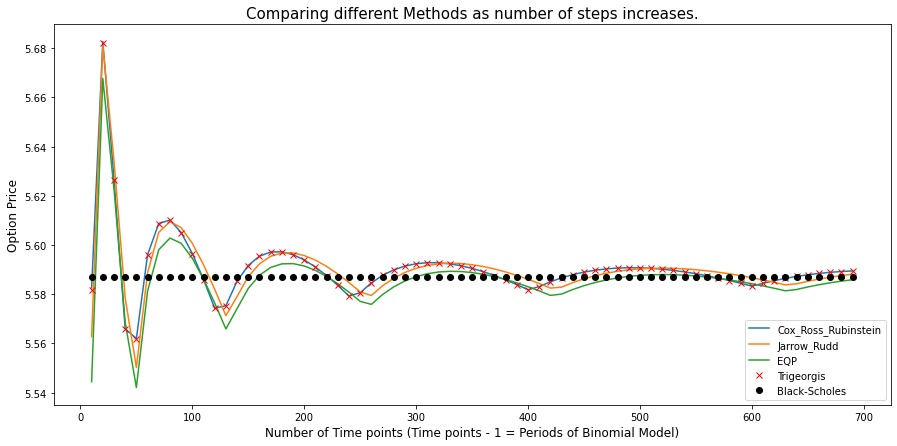

In [22]:
# Initialise Empty list to add Option prices using different method and time steps.
BS, CRR, JR, EQP, TRG = [],[],[],[],[]
M = range(10, 700, 10)

for i in M:
    BS.append(mf.blackscholes(r, S0, K, T, sigma, t=0, type="call"))
    CRR.append(binomial_pricer_vectorized(S0, K, r, T, i, sigma, type = "call"))
    JR.append(binomial_pricer_vectorized_JR(S0, K, r, T, i, sigma, type = "call"))
    EQP.append(binomial_pricer_vectorized_EQP(S0, K, r, T, i, sigma, type = "call"))
    TRG.append(binomial_pricer_vectorized_TRG(S0, K, r, T, i, sigma, type = "call"))

plt.xlabel('Number of Time points (Time points - 1 = Periods of Binomial Model)', fontsize = 12) 
plt.ylabel('Option Price', fontsize = 12) 
plt.plot(M, CRR, label='Cox_Ross_Rubinstein')
plt.plot(M, JR, label='Jarrow_Rudd')
plt.plot(M, EQP, label='EQP')
plt.plot(M, TRG, 'rx',label='Trigeorgis')
plt.plot(M, BS, 'ko',label='Black-Scholes')
plt.legend(loc='lower right')
plt.title('Comparing different Methods as number of steps increases.', fontsize = 15)
plt.show()

### Barrier Options
This is a `Path-dependent option` whose payoff depends upon the whole stock price path $S_t \in [0,T]$.
Let $\tau \in [0,T]$ or $\tau \in [0 < t_0 < \dots < t_k <T]$ be the monitoring dates in continuous and discrete domain respectively and let $B$ be the barrier value. Barrier options can be `up-and-in, up-and-out, down-and-out` etc meaning they either becomes worthless after hitting the barrier $B$ (out) or becomes activated with payoff after hitting the barrier (in).
- Up-and-Out Knock-out Call Option: $$\text{Payoff} = (S-K)^+ \mathbb{1}_{\{\underset{t \in \tau}{\text{Max}} S_T < B\}}$$
- Down-and-Out Knock-out Call Option: $$\text{Payoff} = (S-K)^+ \mathbb{1}_{\{\underset{t \in \tau}{\text{Min}} S_T > B\}}$$

We can use the same Tree as before with stock tree being represented with nodes $(i,j)$ and the initial stock price $S_0$. Each node in the tree is calculated using $S_{i,j} = S_0 u^jd^{i-j}$. Recall, $i$ is the temporal direction while $j$ is node going from bottom to top at each $i$.
- Up-and-Out Knock-out Call Option
    - `Terminal value :` $C_N^j = (S_N^j - K)^+ \mathbb{1}_{\{ S_N^j < B\}}$ for Up-and-Out Knock-out Call Option. 
     - For all other nodes $(i,j)$ we have:
        - If $t_n \in T$ and $S_i^j \geq B$ then $C_i^j = 0$.
        - Else if $t_n \notin T$ or $S_i^j < B$ then $C_i^j = e^{-r\Delta t}\big[\tilde{p}_i^j  C_{i+1}^{j+1} + (1 - \tilde{p}_i^j ) C_{i+1}^{j-1}\big]$.
        
Since European option has no conditions on pricing compared to Barrier option, so $\text{Barrier Option Price} \leq \text{European Option Price}$. Lets write the code for Up-and-Out option.

In [23]:
def binomial_pricer_upandout(S0, K, r, T, M, sigma, B, type = "call"):
    '''
    Calculates the Price of a Barrier call/put option with strike K and maturity T using Binomial Model.
    Uses Cox-Ross-Rubinstein model.
            Parameters:
                    S0 (double): Current price of the underlying asset.
                    K (double) : Strike price of the option.
                    r (double) : Risk-free Interest Rate.
                    T (double) : Time to maturity/expiration (in years).
                    M (Int)    : Number of points in time direction.
                    sigma (double) : Volatility of the underlying asset.
                    B (double) : Barrier Value.
                    type (String) : Barrier call or put option.

            Returns:
                    price (double): Price of a Barrier call/put option.
    '''
    N = M-1     # Number of time steps.
    dt = T/N    # Time-step size.
    u = np.exp(sigma * np.sqrt(dt))
    d = 1/u     # Down-factor in Binomial model. 1/u ensures that it is a recombining tree.
    p = (np.exp(r*dt) - d) / (u-d)    # Risk-Neutral probability measure. 
   
    # Initialising Asset prices at maturity - Time step N.
    S = S0 * d ** (np.arange(N,-1,-1)) * u ** (np.arange(0,N+1,1))

    # Initialise option values at maturity.
    if type == "call":
        O = np.maximum( S - K , np.zeros(N+1) )
    elif type == "put":
        O = np.maximum( K - S , np.zeros(N+1) )    
        
    # Checking if Barrier is crossed at Maturity.
    O[S >= B] = 0

    # Backpropagate to fill the remaining Options values at each nodes.
    for i in np.arange(N-1,-1,-1):
        S = S0 * d**(np.arange(i,-1,-1)) * u**(np.arange(0,i+1,1))
        O[:i+1] = np.exp(-r*dt) * ( p * O[1:i+2] + (1-p) * O[0:i+1] )
        O = O[:-1]
        O[S >= B] = 0

    return O[0]

# Initialise parameters
S0 = 100      # Initial stock price.
K = 100       # Strike price.
T = 0.5       # time to maturity in years.
r = 0.06      # annual risk-free rate.
M = 1000    # number of time points.
sigma = 0.3   # Annualised stock price volatility.
B = 125       # up-and-out barrier price/value.
type = 'call' # Option Type 'call' or 'put'.

barrier_price = binomial_pricer_upandout(S0, K, r, T, M, sigma, B, type = "call")
print(barrier_price)

2.0067555064602067


### American Put Option
We will price American Put option for Non-dividend paying underlying. The payoff of American Put option is $$\text{Payoff} = (K - S_{\tau})^+$$ where $\tau \leq T$ is the time of exercise.

- `Lemma :` It is never optimal to ecercise an American Call option with an underlying that does not pay dividend and when Interest rates are positive.
   - <u>Proof</u>: Assume two portfolios $V_\alpha$ (Buy Call) and $V_\beta$ (Buy Stock). $$V_\alpha = \underbrace{C}_{(S_\tau - K)^+} + Ke^{-r(T-t)}$$ and $$V_\beta = S$$
   When $\tau < T$ (Exercise option before Maturity): $$V_\alpha = (S_\tau - K)^+ + Ke^{-r(T-\tau)} < V_\beta = S_\tau$$
   When $\tau = T$ (Exercise option at Maturity): $$V_\alpha = (S_\tau - K)^+ + K \geq V_\beta = S_T$$
   Since, $V_\alpha \geq V_\beta$ when $\tau = T$, we should not exercise early. This is due to the fact that exercising early means paying $K$ sooner and loosing on interest $K$ generates sitting at bank account. $\blacksquare$
   
American Put option on the other hand can be optimal to exercise early if the Expected discounted value of the payoffs is less than exercise Value today. Its very dependent on the interest rate of the bank account.

Stock tree can be represented using node $(i,j)$ using $S_{i,j} = S_0 u^j d^{i-j}$ as before. At terminal node $C_N^j = (K-S_N^j)^+$. $C_i^j = max\bigg((K-S_i^j)^+,e^{-r\Delta t}\big[\tilde{p}_i^j  C_{i+1}^{j+1} + (1 - \tilde{p}_i^j ) C_{i+1}^{j-1}\big]\bigg)$ for all other nodes.

In [31]:
def binomial_pricer_American(S0, K, r, T, M, sigma, type = "put"):
    '''
    Calculates the Price of a American call/put option with strike K and maturity T using Binomial Model.
    Uses Cox-Ross-Rubinstein model.
            Parameters:
                    S0 (double): Current price of the underlying asset.
                    K (double) : Strike price of the option.
                    r (double) : Risk-free Interest Rate.
                    T (double) : Time to maturity/expiration (in years).
                    M (Int)    : Number of points in time direction.
                    sigma (double) : Volatility of the underlying asset.
                    type (String) : American call or put option.

            Returns:
                    price (double): Price of a American call/put option.
    '''
    N = M-1     # Number of time steps.
    dt = T/N    # Time-step size.
    u = np.exp(sigma * np.sqrt(dt))
    d = 1/u     # Down-factor in Binomial model. 1/u ensures that it is a recombining tree.
    p = (np.exp(r*dt) - d) / (u-d)    # Risk-Neutral probability measure. 
   
    # Initialising Asset prices at maturity - Time step N.
    S = S0 * d ** (np.arange(N,-1,-1)) * u ** (np.arange(0,N+1,1))

    # Initialise option values at maturity.
    if type == "call":
        O = np.maximum( S - K , np.zeros(N+1) )
    elif type == "put":
        O = np.maximum( K - S , np.zeros(N+1) )    
    
    # Backpropagate to fill the remaining Options values at each nodes.
    for i in np.arange(N-1,-1,-1):
        S = S0 * d**(np.arange(i,-1,-1)) * u**(np.arange(0,i+1,1))
        O[:i+1] = np.exp(-r*dt) * ( p * O[1:i+2] + (1-p) * O[0:i+1] )
        O = O[:-1]
        if type == "call":
            O = np.maximum( S - K , O )
        elif type == "put":
            O = np.maximum( K - S , O )    

    return O[0]

# Initialise parameters
S0 = 100      # Initial stock price.
K = 100       # Strike price.
T = 0.5       # time to maturity in years.
r = 0.05      # annual risk-free rate.
M = 100    # number of time points.
sigma = 0.285   # Annualised stock price volatility.
type = 'put' # Option Type 'call' or 'put'.

american_put = binomial_pricer_American(S0, K, r, T, M, sigma, type)
print(american_put)

7.0016880295793
